# Статистический анализ данных сервиса аренды самокатов GoFast

Необходимо изучить данные сервиса аренды самокатов GoFast и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки:
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;  
- с подпиской Ultra:
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.

**Описание данных**

**Пользователи — `users_go.csv`**

- user_id — уникальный идентификатор пользователя
- name — имя пользователя
- age — возраст
- city — город
- subscription_type — тип подписки (free, ultra)

**Поeздки — `rides_go.csv`**

- user_id — уникальный идентификатор пользователя
- distance — расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date — дата совершения поездки

**Подписки — `subscriptions_go.csv`**

- subscription_type — тип подписки
- minute_price — стоимость одной минуты поездки по данной подписке
- start_ride_price — стоимость начала поездки
- subscription_fee — стоимость ежемесячного платежа

**Ход исследования:**

1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение данных
5. Подсчёт выручки
6. Проверка гипотез
7. Общий вывод

## Загрузка данных

In [4]:
# подключаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [5]:
try:
    df_users = pd.read_csv('/datasets/users_go.csv')
    df_rides = pd.read_csv('/datasets/rides_go.csv')
    df_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    df_users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
    df_rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
    df_subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

pd.set_option('display.max_columns', None)

In [6]:
# получение первых cтрок таблицы df_users
display(df_users.head())

# получение первых cтрок таблицы df_rides
display(df_rides.head())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [7]:
# выведем данные по подпискам
df_subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
# изучим общую информацию 
df_users.info()
print("\n" + "="*40 + "\n")  

df_rides.info()
print("\n" + "="*40 + "\n")  

df_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #  

In [9]:
# проверим на явные дубликаты
print('Количество явных дубликатов в `users_go.csv` = ', df_users.duplicated().sum())
print('Количество явных дубликатов в `rides_go.csv` = ', df_rides.duplicated().sum())

Количество явных дубликатов в `users_go.csv` =  31
Количество явных дубликатов в `rides_go.csv` =  0


In [10]:
# дополнительно проверим на пропуски
print('Количество пропусков в `users_go.csv` = ', df_users.isna().sum())
print("\n" + "="*40 + "\n")
print('Количество пропусков в `rides_go.csv` = ', df_rides.isna().sum())
print("\n" + "="*40 + "\n")
print('Количество пропусков в `subscriptions_go.csv` = ', df_subscriptions.isna().sum())

Количество пропусков в `users_go.csv` =  user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


Количество пропусков в `rides_go.csv` =  user_id     0
distance    0
duration    0
date        0
dtype: int64


Количество пропусков в `subscriptions_go.csv` =  subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


**После загрузки данных видим следующее:** 
- df_users 1565 строк, пропуски отсутствуют, количество явных дубликатов - 31.
- df_rides 18068 строк, пропуски отсутствуют, явных дубликатов нет.
- df_subscriptions 2 строки, пропуски отсутствуют. 

Названия столбцов в норме. 
В некоторых столбцах присутствует некорректный тип данных. 
Данные готовы для исследования.

## Предобработка данных
### Обработка дубликатов в users_go

In [13]:
# проверим на неявные дубликаты
df_users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Неявных дубликатов не обнаружено.

In [15]:
# удалим дубликаты
df_users.drop_duplicates(inplace=True)
# проверка
df_users.duplicated().sum()

0

### Обработка типов данных в rides_go

In [17]:
# приведем столбец date из датафрейма data_rides к типу даты.
df_rides['date'] = pd.to_datetime(df_rides['date'], format = '%Y-%m-%d')
# проверка
df_rides['date'].head()

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
Name: date, dtype: datetime64[ns]

In [18]:
# добавим номер месяца
df_rides['month'] = df_rides['date'].dt.month
# проверка
df_rides['month'].head()

0    1
1    1
2    4
3    8
4    8
Name: month, dtype: int32

In [19]:
# приведем столбец к типу данных int
df_rides['duration'] = np.ceil(df_rides['duration']).astype('int')

# округлим продолжительность поездки
df_rides['distance'] = df_rides['distance'].round(2)
df_rides.head()

,user_id,distance,duration,date,month
0,1,4409.92,26,2021-01-01,1
1,1,2617.59,16,2021-01-18,1
2,1,754.16,7,2021-04-20,4
3,1,2694.78,19,2021-08-11,8
4,1,4028.69,27,2021-08-28,8


**Промежуточный итог:**

- удалены дубликаты в users_go;
- добавлен столбец с номером месяца в rides_go;
- столбец date приведен к типу даты datetime64 в rides_go;
- округлили продолжительность поездки в столбце duration в rides_go и привели к типу int;
- округлили distance в метрах до 2 знаков после запятой.

##  Исследовательский анализ данных
### Частота встречаемости городов

In [22]:
# посчитаем количество пользователей в каждом городе датафрейма
df_users['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

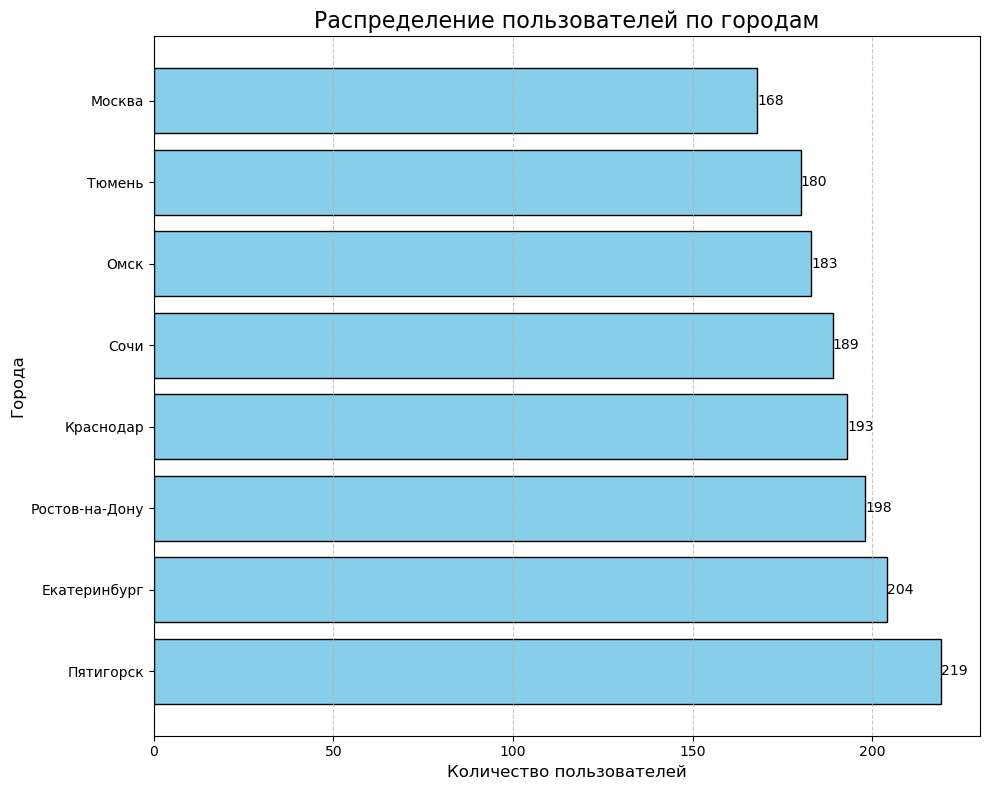

In [23]:
# получаем данные для графика
city_counts = df_users['city'].value_counts()

# настройка графика
plt.figure(figsize=(10, 8))
bars = plt.barh(city_counts.index, city_counts.values, color='skyblue', edgecolor='black')

# добавление подписей на столбцы
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width()}', va='center', ha='left', fontsize=10)

# заголовок и метки осей
plt.title('Распределение пользователей по городам', fontsize=16)
plt.xlabel('Количество пользователей', fontsize=12)
plt.ylabel('Города', fontsize=12)

# сетка для удобства восприятия
plt.grid(axis='x', linestyle='--', alpha=0.7)

# показать график
plt.tight_layout()
plt.show()

**Лидером является город Пятигорск с количеством в 219 строк. Далее идут Екатеринбург и Ростов-на-Дону. Наименьшее количество пользователей находятся в Москве. Хотя, в целом, распределение по городам плюс-минус равномерное.**

### Соотношение пользователей с подпиской и без

In [26]:
df_users['subscription_type'].value_counts()

subscription_type
free     835
ultra    699
Name: count, dtype: int64

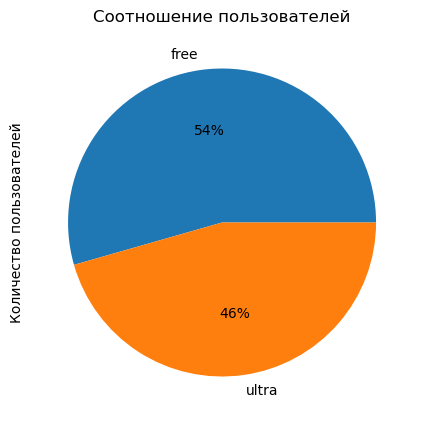

In [159]:
# построим диаграмму
df_users['subscription_type'].value_counts().plot(
    kind = 'pie', 
    autopct='%1.0f%%',
    figsize=(5,5),
    label = 'Количество пользователей',
    title = 'Соотношение пользователей');

**Пользователей с бесплатным тарифом больше, чем пользователей с подпиской.**

### Возраст пользователей

In [31]:
# найдем минимальный и максимальный возраст в таблице
print('Возраст от', df_users['age'].min(), 'до', df_users['age'].max())

Возраст от 12 до 43


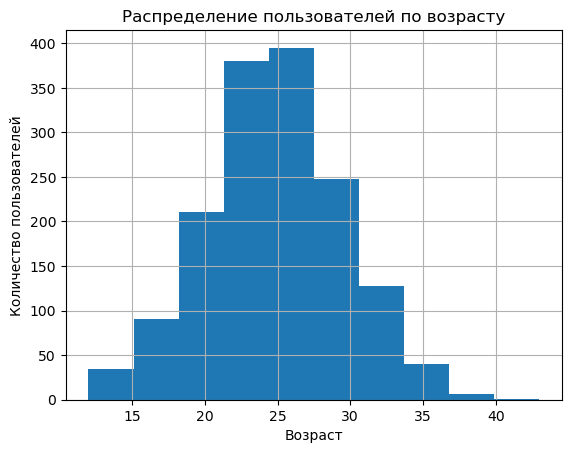

In [32]:
# построим гистограмму
plt.hist(df_users['age'])
plt.title('Распределение пользователей по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

In [33]:
print('Среднее значение возраста пользователей', df_users['age'].mean().round(1))
df_users['age'].describe()

Среднее значение возраста пользователей 24.9


count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

**Сервисом пользуются люди возрастом от 12 до 43 лет. Основная масса пользователей входит в возрастную группу от 22 до 30 лет, средний возраст составляет около 25 лет.**

### Расстояние за одну поездку

In [37]:
df_rides['distance'].describe()

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

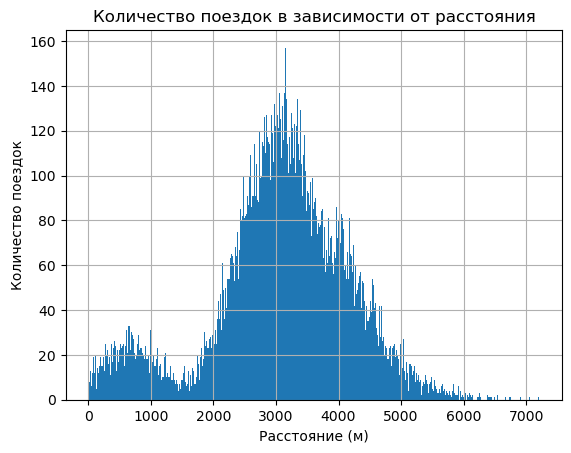

In [38]:
# построим гистограмму
plt.hist(df_rides['distance'], bins=500)
plt.title('Количество поездок в зависимости от расстояния')
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество поездок')
plt.grid()
plt.show()

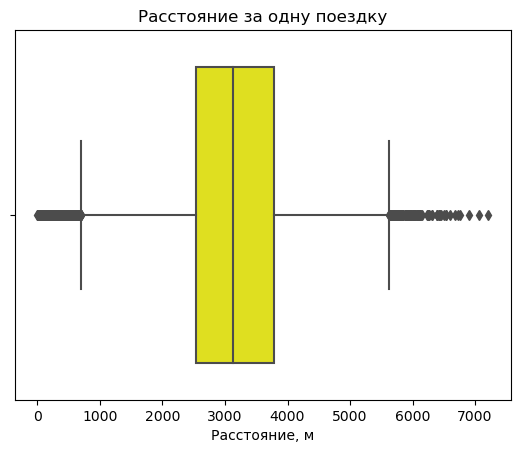

In [39]:
# посмотрим для наглядности на еще один график
sns.boxplot(x=df_rides['distance'], color='yellow')
plt.title('Расстояние за одну поездку')
plt.xlabel('Расстояние, м');

**Расстояние поездок варируется от 860 до 7200 метров. Согласно изученным данным, среднее расстояние одной поездки равно приблизительно 3134 метрам. Наиболее часто пользователи сервиса проезжают расстояние от 2,5 до 3,7 км.**

### Продолжительность поездок

In [43]:
df_rides['duration'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

In [44]:
# найдем самую короткую и самую долгую поездки
print('Самая короткая поездка', df_rides['duration'].min())
print('Самая долгая поездка', df_rides['duration'].max())

Самая короткая поездка 1
Самая долгая поездка 41


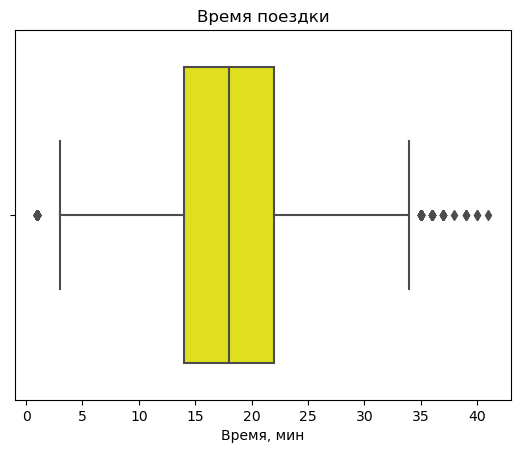

In [45]:
# построим график
sns.boxplot(x=df_rides['duration'], color='yellow')
plt.title('Время поездки')
plt.xlabel('Время, мин');

**В среднем продолжительность поездки составляет от 14 до 22 минут. Так как все минимальные значения были округлены до верхнего "потолка", самые короткие поездки приняты за 1 минуту. На эти данные стоит обратить внимание, возможно, у пользователей возникли сложности с арендой самоката (технические проблемы на стороне приложения), поэтому поездка не состоялась. Самая долгая поездка составляет 41 минуту.**

### Вывод по разделу

1. Наибольшее количество пользователей сервиса находится в г. Пятигорск, наименьшее - в г. Москва.
2. Количество пользователей без подписки (54%) превышает количество пользователей с подпиской (46%).
3. Средний возраст пользователей сервиса от 22 до 30 лет.
4. В среднем, пользователи сервиса проезжают расстояние от 2,5 до 3,7 км.
5. В основном продолжительность поездки составляет от 14 до 22 минут. 

## Объединение данных

### Объединим данные о пользователях, поездках и подписках в один датафрейм. 

In [51]:
data = df_users.merge(df_rides, on='user_id').merge(df_subscriptions, on='subscription_type')
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27,2021-08-28,8,6,0,199


In [52]:
# проверка
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  int32         
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(5), object(3)
memory usage: 1.5+ MB


### Создадим датафрейм с данными о пользователях без подписки

In [55]:
free_users = data.loc[data['subscription_type'] == 'free']
free_users.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,15,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,17,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,21,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,10,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,18,2021-02-14,2,8,50,0


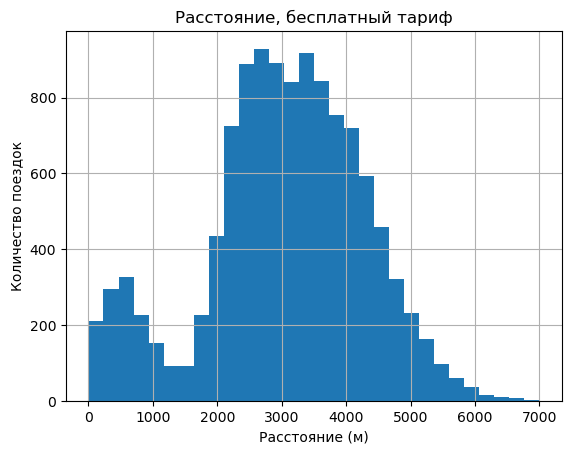

In [56]:
# построим график для этих пользователей по расстоянию
plt.hist(free_users['distance'], bins=30, range=(0,7000))
plt.title('Расстояние, бесплатный тариф')
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество поездок')
plt.grid()
plt.show()

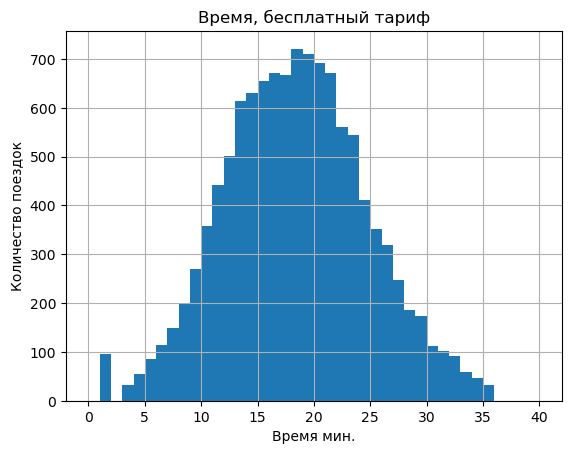

In [57]:
# построим график для этих пользователей по времени
plt.hist(free_users['duration'], bins=40, range = (0, 40))
plt.title('Время, бесплатный тариф')
plt.xlabel('Время мин.')
plt.ylabel('Количество поездок')
plt.grid()
plt.show()

In [58]:
free_users['distance'].describe()

count    11568.000000
mean      3045.495284
std       1246.173810
min          0.860000
25%       2366.560000
50%       3114.650000
75%       3905.695000
max       7211.010000
Name: distance, dtype: float64

In [59]:
free_users['duration'].describe()

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

Пользователи с бесплатным тарифом пользуются сервисом для поездок на расстояния от 2 до 4 км., продолжительностью от 13 до 22 минут. Именно среди этих пользователей присутствуют поездки с расстоянием в 0,86 метра и длительностью 1 минута.

### Создадим датафрейм с данными о пользователях с подпиской

In [62]:
ultra_users = data.loc[data['subscription_type'] == 'ultra']
ultra_users.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27,2021-08-28,8,6,0,199


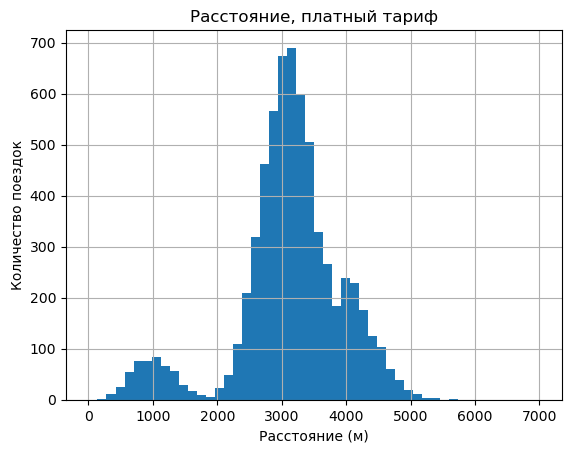

In [63]:
# построим график для этих пользователей по расстоянию
plt.hist(ultra_users['distance'], bins=50, range=(0,7000))
plt.title('Расстояние, платный тариф')
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество поездок')
plt.grid()
plt.show()

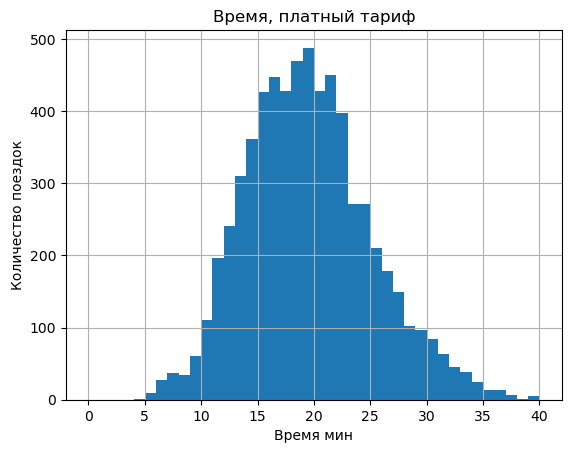

In [64]:
# построим график для этих пользователей по времени
plt.hist(ultra_users['duration'], bins=40, range=(0,40))
plt.title('Время, платный тариф')
plt.xlabel('Время мин')
plt.ylabel('Количество поездок')
plt.grid()
plt.show()

In [65]:
ultra_users['distance'].describe()

count    6500.000000
mean     3115.445431
std       836.895369
min       244.210000
25%      2785.447500
50%      3148.640000
75%      3560.577500
max      5699.770000
Name: distance, dtype: float64

In [66]:
ultra_users['duration'].describe()

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

Пользователи с подпиской тратят на поездку от 15 до 22 минут, преодолевают расстояние, в среднем, от 2,7 км до 3,5 км.

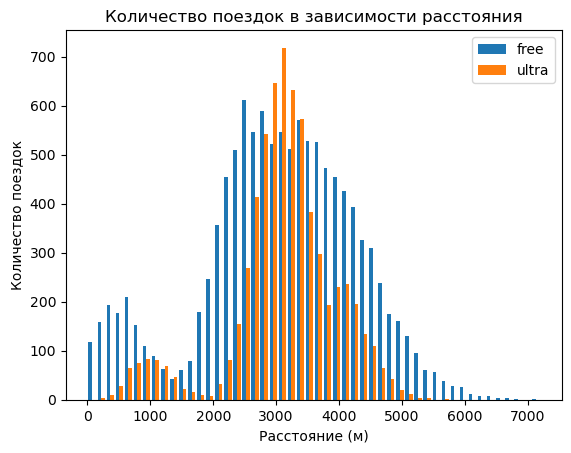

In [68]:
# построим сравнительные графики
plt.hist([free_users['distance'], ultra_users['distance']], bins=50, range=(1,7200), label=['free', 'ultra'])
plt.legend(loc='upper right')
plt.title('Количество поездок в зависимости расстояния')
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество поездок')
plt.show()

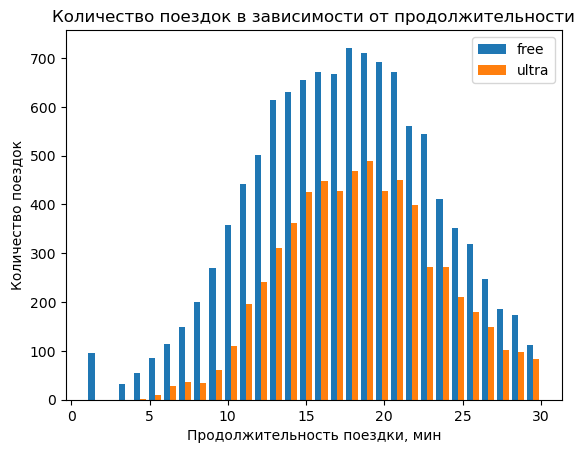

In [69]:
plt.hist([free_users['duration'], ultra_users['duration']], bins=30, range=(1,30), label=['free', 'ultra'])
plt.legend(loc='upper right')
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('Продолжительность поездки, мин')
plt.ylabel('Количество поездок')
plt.show()

**Вывод по разделу:**

Объединили данные о пользователях, поездках и тарифах в один датафрейм.

Выделили два датафрейма на основе data:

- free_users - данные о пользователях с бесплатным тарифом
- ultra_users - данные о пользователях с платным тарифом

Визуализировали информацию о расстоянии и времени для каждого из тарифов.

Для бесплатного тарифа время поездки составляет от 13 до 22 минут, и проезжают от 2 до 4 км. Есть пользователи, которые проехали более 6 км., также есть и такие, кто по какой-то причине передумал пользоваться сервисом - их время в пути 1 минута.

Пользователи с подпиской, в основном, укладываются в промежуток от 15 до 22 минут. Большинство преодолевают расстояние около 3 км, - об этом нам сообщает пик на графике.

Таким образом, можно сделать вывод, что пользователи с бесплатным тарифом в целом совершают больше поездок и их дистанция более разнообразна. 

## Подсчёт выручки
### Датафрейм с агрегированными данными о поездках на основе data

Найдем для каждого пользователя за каждый месяц: 
1. Суммарное расстояние
2. Количество поездок
3. Суммарное время

In [73]:
# создадим сводную таблицу
user_per_month = data.pivot_table(index=['month', 'user_id'],
                                  values=['distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee', 'subscription_type'],
                                  aggfunc=({'distance':{'count', 'sum'},
                                            'duration':'sum', 
                                            'minute_price': 'mean',
                                            'start_ride_price':'mean',
                                            'subscription_fee':'mean',
                                            'subscription_type':'min'}))
                                           

user_per_month.columns=['count', 'distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee', 'subscription_type']

user_per_month.sort_values(by='month').head(20)

count  distance  duration  minute_price  start_ride_price  \
month user_id                                                              
1     1            2   7027.51        42           6.0               0.0   
      1061         3  12637.25        43           8.0              50.0   
      1063         1   3276.36        10           8.0              50.0   
      1064         1   5297.32        15           8.0              50.0   
      1065         4  14547.10        99           8.0              50.0   
      1066         1   2809.06        19           8.0              50.0   
      1067         1   3864.90        22           8.0              50.0   
      1069         3   7007.08        53           8.0              50.0   
      1071         1   3635.09        15           8.0              50.0   
      1072         1   2498.62        11           8.0              50.0   
      1073         1   2945.80        16           8.0              50.0   
      1074         1   2814.79        22           8.0              50.0   
      1075         3   5746.75        29           8.0              50.0   
      1077         1    114.04        13           8.0              50.0   
      1078         1   3748.22        19           8.0              50.0   
      1082         2   7250.13        30           8.0              50.0   
      1083         2   5848.88        31           8.0              50.0   
      1084         1   4615.10        25           8.0              50.0   
      1085         3  11410.54        63           8.0              50.0   
      1086         1   4044.28        18           8.0              50.0   

               subscription_fee subscription_type  
month user_id                                      
1     1                   199.0             ultra  
      1061                  0.0              free  
      1063                  0.0              free  
      1064                  0.0              free  
      1065                  0.0              free  
      1066                  0.0              free  
      1067                  0.0              free  
      1069                  0.0              free  
      1071                  0.0              free  
      1072                  0.0              free  
      1073                  0.0              free  
      1074                  0.0              free  
      1075                  0.0              free  
      1077                  0.0              free  
      1078                  0.0              free  
      1082                  0.0              free  
      1083                  0.0              free  
      1084                  0.0              free  
      1085                  0.0              free  
      1086                  0.0              free

### Добавление данных с выручкой для каждого пользователя

In [75]:
user_per_month['revenue'] = (
    user_per_month['start_ride_price'] * user_per_month['count'] + 
    user_per_month['minute_price'] * user_per_month['duration'] + 
    user_per_month['subscription_fee'])

user_per_month.sample(10)

,,count,distance,duration,minute_price,start_ride_price,subscription_fee,subscription_type,revenue
month,user_id,,,,,,,,
7,770,2,4123.61,20,8.0,50.0,0.0,free,260.0
9,1180,2,5564.14,35,8.0,50.0,0.0,free,380.0
12,626,1,1479.50,19,6.0,0.0,199.0,ultra,313.0
4,560,2,7990.18,50,6.0,0.0,199.0,ultra,499.0
9,37,2,4030.96,32,6.0,0.0,199.0,ultra,391.0
8,1118,2,5978.50,23,8.0,50.0,0.0,free,284.0
4,1029,2,6708.44,46,8.0,50.0,0.0,free,468.0
1,1126,2,8053.90,44,8.0,50.0,0.0,free,452.0
6,1047,2,3576.59,24,8.0,50.0,0.0,free,292.0


In [76]:
# проверим на случайном пользователе
user_per_month.query('user_id == 7')

,,count,distance,duration,minute_price,start_ride_price,subscription_fee,subscription_type,revenue
month,user_id,,,,,,,,
1,7,2,6478.08,28,6.0,0.0,199.0,ultra,367.0
3,7,1,3679.56,21,6.0,0.0,199.0,ultra,325.0
4,7,2,4888.95,38,6.0,0.0,199.0,ultra,427.0
5,7,1,2971.56,15,6.0,0.0,199.0,ultra,289.0
6,7,1,2508.55,19,6.0,0.0,199.0,ultra,313.0
7,7,2,6097.83,35,6.0,0.0,199.0,ultra,409.0
8,7,1,3008.26,15,6.0,0.0,199.0,ultra,289.0
11,7,4,12879.35,67,6.0,0.0,199.0,ultra,601.0
12,7,2,6195.34,30,6.0,0.0,199.0,ultra,379.0


**Создан датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
Добавлен столбец с помесячной выручкой, которую принёс каждый пользователь.** 

## Проверка гипотез
### Пользователи с подпиской тратят больше времени на поездки

Проверим гипотезу: пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе.

**Гипотеза Н0:** Средняя продолжительность поездок с подпиской 'ultra' и 'free' равна.

**Гипотеза Н1:** Средняя продолжительность поездок с подпиской 'ultra' больше, чем с подпиской 'free'.

In [82]:
a = free_users['duration']
b = ultra_users['duration']

results = st.ttest_ind(b, a, alternative = 'greater')
alpha = .05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')  

p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


**Вывод.**

Нулевая гипотеза отвергнута, средняя продолжительность поездок с подпиской 'ultra' больше, чем с подпиской 'free'.

### Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

3130 метров — оптимальное расстояние с точки зрения износа самоката.

**Гипотеза Н0:** Среднее расстояние поездок с использованием подписки 'ultra' равно оптимальному расстоянию в 3130 метров.

**Гипотеза Н1:** Среднее расстояние поездок с использованием подписки 'ultra' больше 3130 метров.

In [88]:
b = ultra_users['distance']
interested_value = 3130

results = st.ttest_1samp(b, interested_value, alternative = 'greater')
alpha = .05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195362605842414
Не получилось отвергнуть нулевую гипотезу


**Вывод.**

Не получилось отвергнуть нулевую гипотезу, а значит, нельзя утверждать, что среднее расстояние поездок с использованием подписки 'ultra' не превышает оптимальное расстоянием в 3130 метров с точки зрения износа самоката.


### Ежемесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

**Гипотеза Н0:** Средняя выручка от поездок с разной подпиской равна.

**Гипотеза Н1:** Средняя выручка от поездок с использованием подписки 'ultra' больше, чем выручка с ипользованием подписки 'free'.

In [95]:
c = user_per_month.loc[user_per_month['subscription_fee'] > 0, 'revenue']
d = user_per_month.loc[user_per_month['subscription_fee'] == 0, 'revenue']

results = st.ttest_ind(c, d, alternative = 'greater')
alpha = .05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')    

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


**Вывод**

Нулевая гипотеза отвергнута, а значит выручка от пользователей с подпиской 'ultra' выше, чем от пользователей с бесплатным тарифом.

### После обновления сервера количество обращений в техподдержку снизилось.

Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. 

Необходимо проверить одну генеральную совокупность, с которой произошли изменения. 
Будем проверять, равны ли средние совокупности до и после этого изменения. В нашем примере это пара измерений для каждого пользователя — до и после обновления серверов.

Если в данных некоторая переменная измеряется дважды для одних и тех же объектов и имеют одинаковые размеры, тогда можно применить метод `scipy.stats.ttest_rel()`.
Если указать `alternative='less'`, проверится левосторонняя альтернативная гипотеза о том, что истинное среднее генеральной совокупности до изменения меньше, чем истинное среднее генеральной совокупности после изменения.

**Вывод по разделу**

1. Нулевая гипотеза отвергнута, средняя продолжительность поездок с подпиской 'ultra' больше, чем с подпиской 'free'.
2. Не получилось отвергнуть нулевую гипотезу, а значит, нельзя утверждать, что среднее расстояние поездок с использованием подписки 'ultra' не превышает оптимальное расстоянием в 3130 метров с точки зрения износа самоката.
3. Нулевая гипотеза отвергнута, а значит выручка от пользователей с подпиской 'ultra' выше, чем от пользователей с бесплатным тарифом.
4. Для сравнения зависимых выборок необходимо применить метод `scipy.stats.ttest_rel()`.

## Общий вывод

В данном исследовании были проанализированы данные пользователей сервиса аренды самокатов GoFast.

1. Изучены 3 датафрейма с данными: 
- о пользователях,
- об их поездках,
- о подписках на сервис.

В процессе изучения общей информации не было обнаружено пропусков в данных и неявных дубликатов.

2. Проведена предобработка данных: 

 * удалены дубликаты в `users_go`;
 * добавлен столбец с номером месяца в `rides_go`;
 * столбец `date` приведен к типу даты datetime64 в `rides_go`;
 * округлили продолжительность поездки в столбце `duration` в `rides_go` и привели к типу int;
 * округлили `distance` в метрах до 2 знаков после запятой.
 
3. Проведен исследовательский анализ данных:

 * выявлено, что количество пользователей по городам распределено относительно равномерно, нет выдающихся значений;
 * наибольшее количество пользователей сервиса находится в г. Пятигорск, наименьшее - в г. Москва;
 * количество пользователей без подписки (835 человек ~ 54%) превышает количество пользователей с подпиской (699 человек ~ 46%);
 * средний возраст пользователей сервиса от 22 до 30 лет;
 * в среднем, пользователи сервиса проезжают расстояние от 2,5 до 3,7 км;
 * в основном продолжительность поездки составляет от 14 до 22 минут.

4. Объединили данные о пользователях, поездках и тарифах в один датафрейм `data`.

На основании полученных данных сформировали еще два датафрейма:

- `free_users` - данные о пользователях с бесплатным тарифом
- `ultra_users` - данные о пользователях с платным тарифом

Визуализировали информацию о расстоянии и времени для каждого из тарифов:

- для бесплатного тарифа время поездки составляет от 13 до 22 минут, пользователи проезжают от 2 до 4 км. 
- пользователи с подпиской, в основном, укладываются в промежуток от 15 до 22 минут. Большинство преодолевают расстояние около 3 км.

Сделан вывод, что пользователи с бесплатным тарифом в целом совершают больше поездок и их дистанция более разнообразна.

5. Создан датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными `data`: 
- нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. 
- обавлен столбец с помесячной выручкой, которую принёс каждый пользователь.

6. Проверены гипотезы:

- пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе:
    - нулевая гипотеза отвергнута;
- среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров:
    - не получилось отвергнуть нулевую гипотезу;
- ежемесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки:
    - нулевая гипотеза отвергнута.